# FBI Gun Data - Investigate a Dataset 
## By: Sumaya Altamimi
### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I want to investigate two datasets:
<br>1)**The NICS data** which contains the number of firearm checks by month, state, and type. 
<br>2)**The U.S. census data** which contains several variables at the state level.<br>

My goal is to answer these questions:<br>
<ul>
<li><a href="#q1">Which states have had the highest growth in gun registrations?</a></li>
<li><a href="#q2">Which years have had the highest growth in gun registrations?</a></li>
<li><a href="#q3">What census data is most associated with long gun per capita?</a></li>
<li><a href="#q4">What is the overall trend of gun purchases?</a></li>
</ul>

<a id='wrangling'></a>
## Data wrangling
In this section I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 
steps carefully and justify your cleaning decisions.

#### General Properties
First, will import the important libraries and load our datasets.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
NICS_data = pd.read_excel('gun_data.xlsx')
US_census_data = pd.read_csv('U.S. Census Data.csv')

In [2]:
NICS_data.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [3]:
US_census_data.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


### 1.Data Cleaning 
Check for nulls, duplicates, and data types

will check and then remove duplicates from `US_census_data` data sets

In [4]:
sum(US_census_data.duplicated())

3

In [5]:
US_census_data[US_census_data.duplicated()]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like `US_census_data` has 3 duplicated NaN rows

In [6]:
US_census_data.fillna(0,inplace=True)

In [7]:
US_census_data.drop_duplicates(inplace=True)

In [8]:
sum(US_census_data.duplicated())

0

In [9]:
sum(US_census_data.isnull().sum())

0

Now, I will check the data types of `US_census_data`

In [10]:
US_census_data.dtypes.all()

dtype('O')

Now, I will change to float, but only the first row(2016 puplication), wich is what we need

In [11]:
states = US_census_data.columns[2:]
us_census_states = US_census_data[states]

for state in states:
    string_value = us_census_states[state][0]
    string_value = string_value.replace("'",'')
    string_value = string_value.replace(",","")
    string_value = string_value.replace("%","")
    string_value = float(string_value)
    US_census_data[state][0] = string_value

will check and then remove duplicates from `NICS_data` data sets

In [12]:
sum(NICS_data.duplicated())

0

In [13]:
sum(NICS_data.isnull().sum())

154595

Looks like `NICS_data` has no duplicates but many null values!
I will replace them with zeros

In [14]:
NICS_data.fillna(0,inplace=True)

In [15]:
sum(NICS_data.isnull().sum())

0

In [16]:
NICS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12485 non-null  float64
 3   permit_recheck             12485 non-null  float64
 4   handgun                    12485 non-null  float64
 5   long_gun                   12485 non-null  float64
 6   other                      12485 non-null  float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12485 non-null  float64
 9   prepawn_handgun            12485 non-null  float64
 10  prepawn_long_gun           12485 non-null  float64
 11  prepawn_other              12485 non-null  float64
 12  redemption_handgun         12485 non-null  float64
 13  redemption_long_gun        12485 non-null  flo

### I will add a column `year` to simplify the analysis

In [17]:
NICS_data['year'] = NICS_data['month'].str.slice(stop=4)
NICS_data.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017


<a id='eda'></a>
## Exploratory Data Analysis
Now, I will answer the research questions.
<a id='q1'></a>
### Which states have had the highest growth in gun registrations?

In [18]:
mean_totals = NICS_data['totals'].mean()
high_total_states = NICS_data.query('totals>@mean_totals')
high_total_states = high_total_states.groupby(by='state').sum()
high_total = high_total_states['totals'].max()
high_total

28617553

In [19]:
high_total_states.query('totals==@high_total')

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Kentucky,24926779.0,0.0,1350007.0,1657082.0,19869.0,85452,28236.0,1619.0,2871.0,24.0,...,1.0,0.0,0.0,341.0,271.0,11.0,13.0,14.0,7.0,28617553


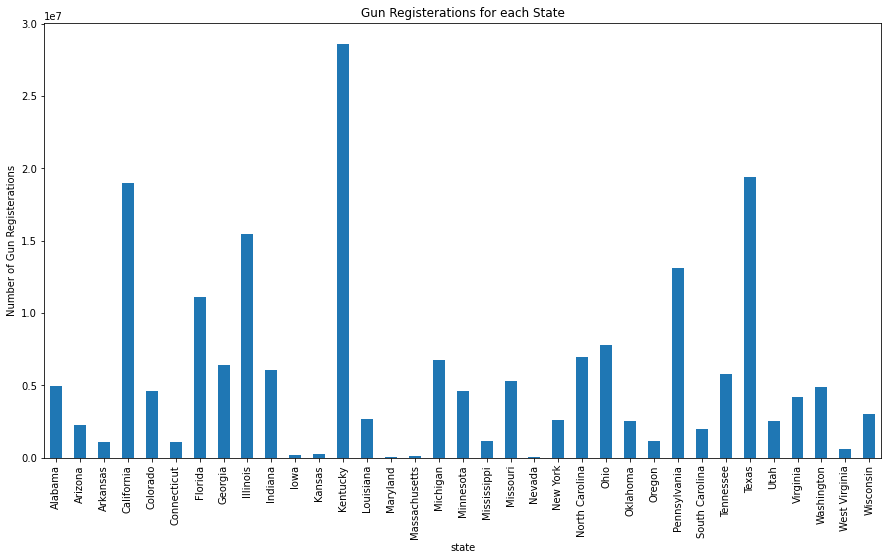

In [20]:
high_total_states['totals'].plot(kind='bar',figsize=(15,8),title='Gun Registerations for each State',ylabel='Number of Gun Registerations');

### Reasoning/ Findings
As you might see in the scatter plot above, it's very obvious that the state **Kentucky** is the highest in growth in gun registrations.
Now , will move to the second question:

<a id='q2'></a>
### Which years have had the highest growth in gun registrations?
I will create new data set `NICS_data_per_year` <br>
Then I will check the statistics of the data set

In [21]:
NICS_data_per_year = NICS_data.groupby('year').sum()
NICS_data_per_year.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,2.000000e+01,20.000000,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,3.996012e+06,64127.600000,3.702654e+06,4.868501e+06,99129.700000,167675.650000,36699.400000,2544.850000,4128.600000,42.350000,...,93.250000,3.800000,3.600000,2053.700000,1595.400000,141.650000,49.750000,60.750000,11.950000,1.348113e+07
std,3.095401e+06,201310.993106,2.120440e+06,1.315503e+06,159655.420278,78686.944107,45354.159068,1420.486102,2790.245648,68.701701,...,236.513018,11.932265,11.882761,5021.595271,3865.373018,343.455394,115.559452,136.555319,30.655085,6.497589e+06
min,7.816900e+04,0.000000,2.199990e+05,5.827910e+05,0.000000,8720.000000,2219.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.918980e+05
25%,1.359956e+06,0.000000,2.185712e+06,4.554734e+06,0.000000,101297.750000,6418.500000,2210.500000,2558.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.760006e+06
50%,3.388912e+06,0.000000,2.983414e+06,4.875076e+06,0.000000,174999.000000,12535.000000,2727.000000,4083.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.192763e+07
75%,5.805118e+06,0.000000,5.352768e+06,5.454335e+06,175311.250000,231623.750000,56155.750000,3147.250000,5573.500000,50.750000,...,0.000000,0.000000,0.000000,96.250000,102.250000,17.000000,0.500000,4.750000,0.500000,1.835885e+07
max,1.113465e+07,763287.000000,8.085498e+06,7.128798e+06,586137.000000,324401.000000,148115.000000,5146.000000,11080.000000,193.000000,...,791.000000,52.000000,50.000000,17227.000000,13312.000000,1152.000000,362.000000,416.000000,121.000000,2.742551e+07


As shown in the above table, the mean of the long gun is grater than the mean of the hand gun data <br>
I will check the hand gun data for each year to detirmin what year has the highest registeration.

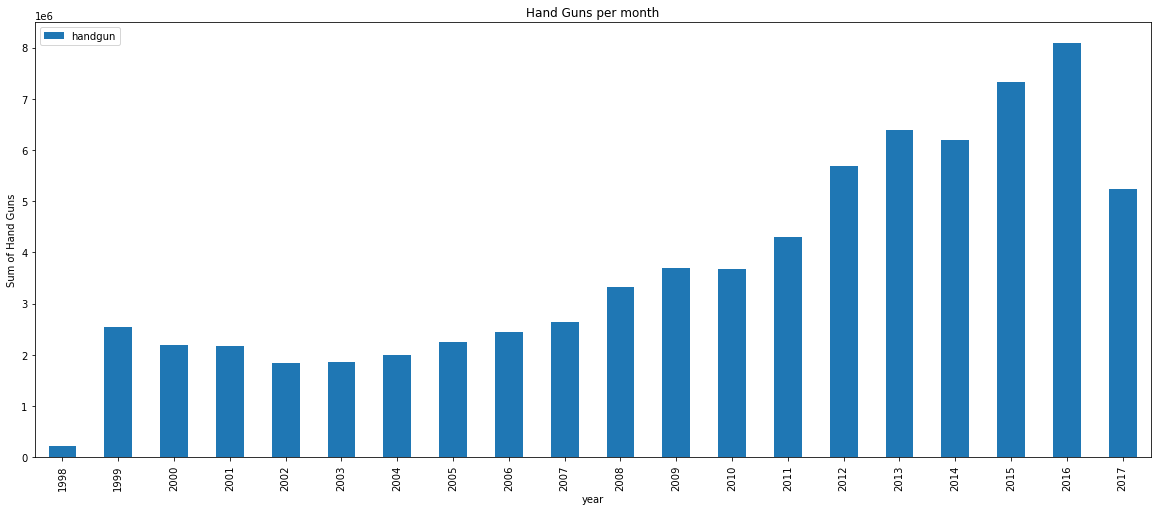

In [22]:
NICS_data_per_year['handgun'].plot(kind='bar',legend=True,figsize=(20,8),title='Hand Guns per month',ylabel='Sum of Hand Guns');

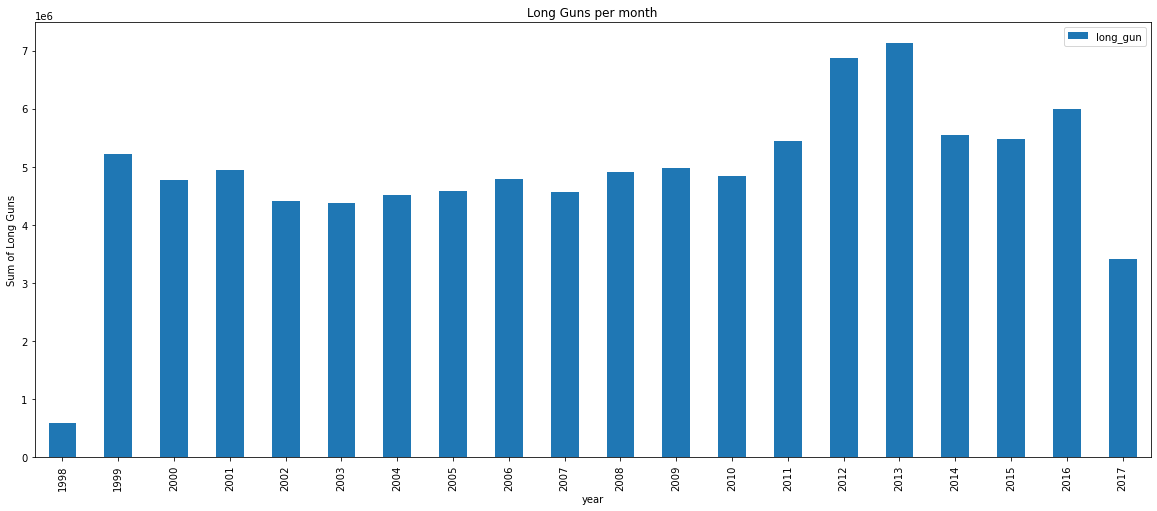

In [23]:
NICS_data_per_year['long_gun'].plot(kind='bar',legend=True,figsize=(20,8),title='Long Guns per month',ylabel='Sum of Long Guns');

### Reasoning/ Findings
As you see, almost **2015-2016**, has the highest registeration of ***hand guns***<br>
and **2012-2013** has the highest registeration of **long guns** <br>
and the overall comparison by year , **long gun is the dominating**.<br>
The shown plot below illustrate the idea.

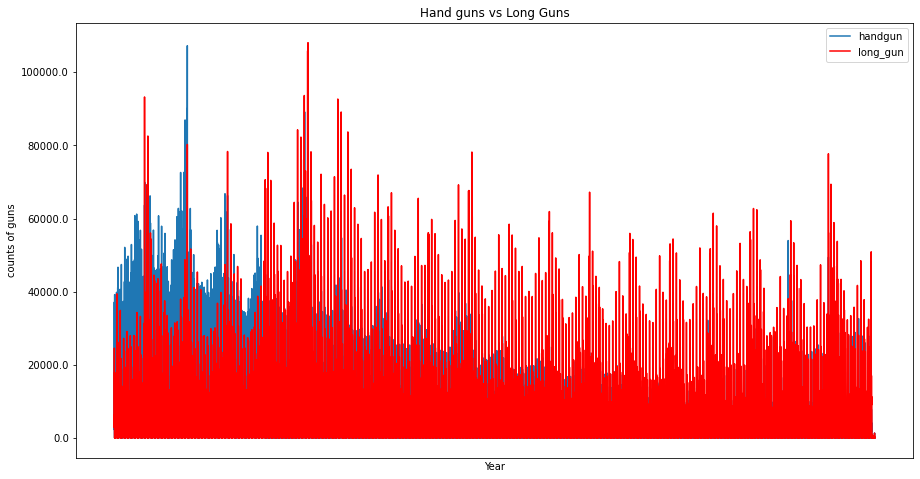

In [24]:
def PlotFunc(data,title,x,xlabel,y1,y2,ylabel):
    fig, ax = plt.subplots(figsize=(15,8))
    ax.yaxis.set_major_formatter('{x:.1f}')
    ax.set(xticks=[])
    data.plot(x = x, y = y1, ylabel=ylabel,ax = ax,title=title);
    data.plot(x = x, y = y2, c='r',xlabel=xlabel,ax = ax,title=title);
    return 
PlotFunc(NICS_data,'Hand guns vs Long Guns','year','Year','handgun','long_gun','counts of guns')

### Reasoning/ Findings
As you see,when we compare by year , Long gun is the overpowering

<a id='q3'></a>
### What census data is most associated with long gun per capita?
I will check the maximum value of long gun, in 2015, December

In [25]:
mean_long_gun = NICS_data['long_gun'].mean()
high_long_gun_states = NICS_data.query('long_gun>@mean_long_gun')
high_long_gun_states = high_long_gun_states.groupby(by='state').sum()
high_long_gun_states.head(2)

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Alabama,765096.0,0.0,1806155.0,2239883.0,35009.0,86544,31.0,2661.0,3890.0,19.0,...,0.0,1.0,0.0,86.0,93.0,10.0,11.0,6.0,0.0,5455986
Arizona,228934.0,3784.0,605521.0,491701.0,30261.0,28925,633.0,317.0,208.0,8.0,...,3.0,0.0,0.0,150.0,94.0,15.0,12.0,7.0,2.0,1486894


I will check the state of the maximum value of Long gun.

In [26]:
max_gun = high_long_gun_states['long_gun'].max()
high_long_gun_states.query('long_gun==@max_gun')

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
state,,,,,,,,,,,,,,,,,,,,,
Pennsylvania,1387955.0,0.0,1944501.0,9343700.0,5378.0,59382,4387.0,3.0,9.0,0.0,...,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12762672


I will check the population estimates of Texas in July 1, 2016

In [27]:
Pennsylvania_publication = US_census_data['Pennsylvania']
Pennsylvania_publication = Pennsylvania_publication[0]
Pennsylvania_publication

12784227.0

I Will see the proportion

In [28]:
proportion = max_gun/Pennsylvania_publication
proportion

0.7308771973463863

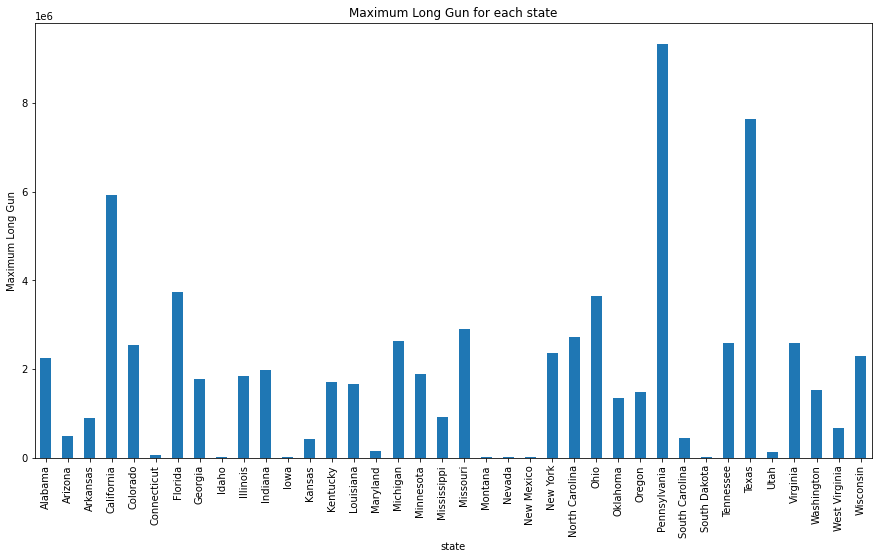

In [29]:
high_long_gun_states['long_gun'].plot(kind='bar',figsize=(15,8),title='Maximum Long Gun for each state',ylabel='Maximum Long Gun');

### Reasoning/ Findings
As you see, almost **73%** of census in **Pennsylvania** is associated with long gun 

Now, I will answer my last question <br> 
<a id='q4'></a>
### What is the overall trend of gun purchases?

In [30]:
cols = NICS_data.columns[1:2]
cols = cols.append(NICS_data.columns[15:26])
purchases_data = pd.DataFrame(columns=cols,data = NICS_data)
purchases_data.columns

Index(['state', 'returned_handgun', 'returned_long_gun', 'returned_other',
       'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other'],
      dtype='object')

In [31]:
purchases_data.describe()

,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,5.218102,1.298438,0.149379,0.006087,0.005767,3.289868,2.555707,0.226912,0.079696,0.097317,0.019143
std,36.194758,9.590870,1.710795,0.179790,0.173912,33.987054,25.908792,2.139596,0.663611,0.740136,0.186114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000


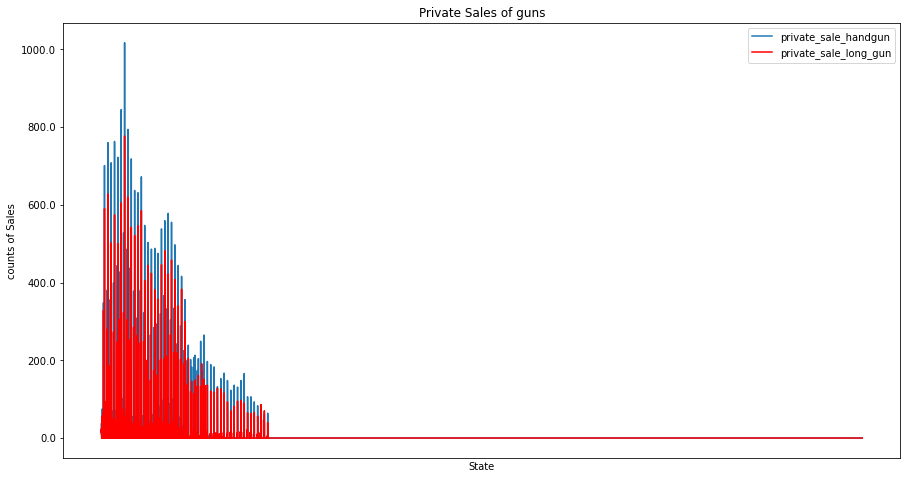

In [32]:
PlotFunc(purchases_data,'Private Sales of guns','state','State','private_sale_handgun','private_sale_long_gun','counts of Sales')

### Reasoning/ Findings
Private Sales of **Hand guns** is **moere than** Private Sales of **Long guns**

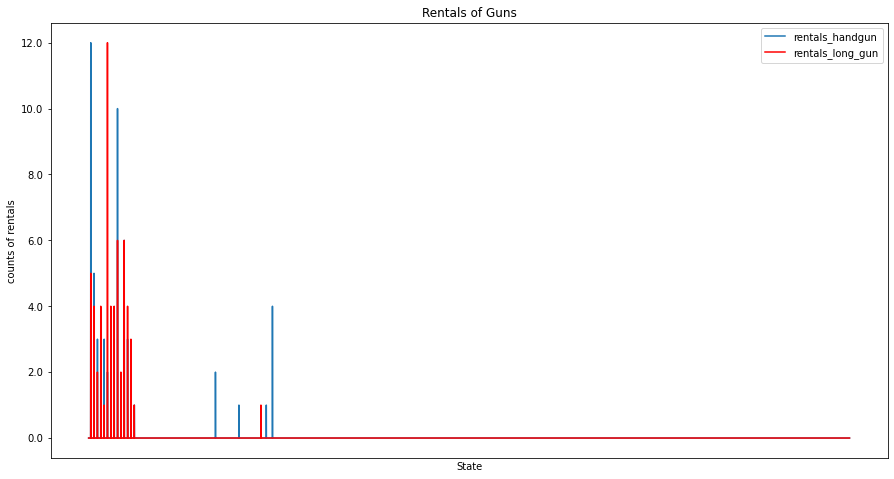

In [33]:
PlotFunc(purchases_data,'Rentals of Guns','state','State','rentals_handgun','rentals_long_gun','counts of rentals')

### Reasoning/ Findings
Rentals of **Hand guns** is **moere than** rentals of **Long guns**

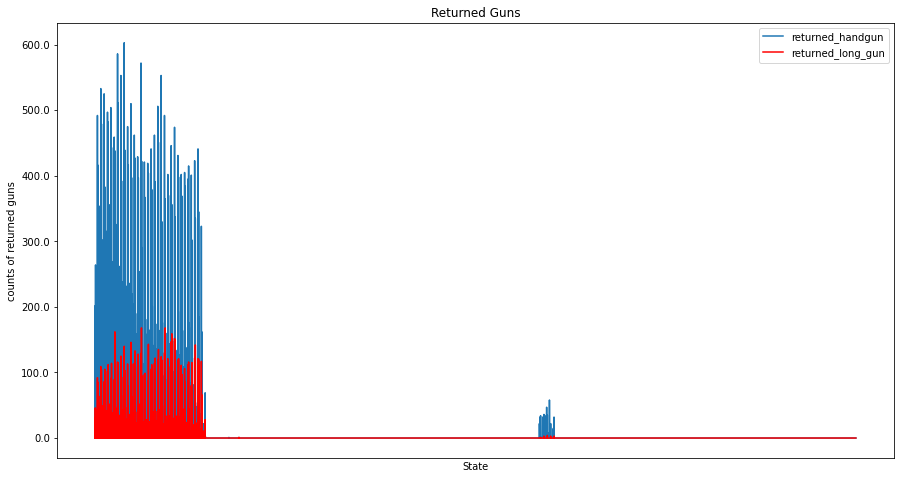

In [34]:
PlotFunc(purchases_data,'Returned Guns','state','State','returned_handgun','returned_long_gun','counts of returned guns')

### Reasoning/ Findings
Returned **Hand guns** is **moere than** returned **Long guns**

<a id='conclusions'></a>
## Conclusion and Limitations
**I noticed these important trends on theses datasets:**

1) The census data in **Pennsylvania** is most associated with high gun per capita with **73%**<br>
2) **Kentucky** states have had the highest growth in gun registrations.<br>
3) The overall trend of gun purchases appears to be skewed towards **Hand Gun**.<br>
4) **2015-2016**, has the highest registeration of **Hand Guns**<br>
5) **2012-2013** has the highest registeration of **Long Guns**

**There are also some limitations:**
<ol>
<li>Long guns totals is greater than Hand guns when comparing by year</li>
<li>Hand guns totals is greater than Long guns when comparing by state</li>

</ol>